In [1]:
from google.colab import drive # mounts the google drive for a new notebook 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# load the 2 npy files created by the process_yale_images.ipynb 
from numpy import load
import numpy as np
path = '/content/drive/My Drive/'
# load array
y = load(path + 'yaleExtB_target.npy')
X = load(path + 'yaleExtB_data.npy')

In [0]:
from sklearn.model_selection import train_test_split # loads functions from the ML library sklearn 
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

import matplotlib.pyplot as plt 

In [0]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
# PCA 
nof_prin_components = 200  # PARAMETER for optimisation in expereiments
pca = PCA(n_components=nof_prin_components, whiten=True).fit(X_train)
# applies PCA to the train and test images to calculate the principal components
X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test)

[Documentation of ML sklearn library](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

In [7]:
# train a neural network
nohn = 200 # nof hidden neurons
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(nohn,), solver='sgd', activation='tanh', batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 3.70722148
Validation score: 0.025000
Iteration 2, loss = 3.68500651
Validation score: 0.025000
Iteration 3, loss = 3.65124602
Validation score: 0.033333
Iteration 4, loss = 3.61079790
Validation score: 0.033333
Iteration 5, loss = 3.56665446
Validation score: 0.033333
Iteration 6, loss = 3.52012526
Validation score: 0.033333
Iteration 7, loss = 3.47262153
Validation score: 0.033333
Iteration 8, loss = 3.42440531
Validation score: 0.033333
Iteration 9, loss = 3.37581216
Validation score: 0.033333
Iteration 10, loss = 3.32762009
Validation score: 0.033333
Iteration 11, loss = 3.27944871
Validation score: 0.050000
Iteration 12, loss = 3.23173889
Validation score: 0.058333
Iteration 13, loss = 3.18430986
Validation score: 0.075000
Iteration 14, loss = 3.13686464
Validation score: 0.083333
Iteration 15, loss = 3.08968046
Validation score: 0.091667
Iteration 16, loss = 3.04284163
Validation score: 0.091667
Iteration 17, loss = 2

In [8]:
y_pred = clf.predict(X_test_pca) # reoognises the test images 
print(classification_report(y_test, y_pred)) # the recognition accuracy

              precision    recall  f1-score   support

         2.0       0.86      1.00      0.92         6
         3.0       1.00      0.86      0.92        14
         4.0       0.91      1.00      0.95        10
         5.0       0.92      1.00      0.96        11
         6.0       0.91      1.00      0.95        10
         7.0       1.00      1.00      1.00        11
         8.0       0.89      0.89      0.89         9
         9.0       0.83      0.83      0.83         6
        11.0       1.00      1.00      1.00         7
        12.0       1.00      1.00      1.00         7
        13.0       1.00      0.80      0.89        15
        15.0       1.00      0.90      0.95        10
        16.0       1.00      0.71      0.83         7
        17.0       0.80      1.00      0.89         4
        18.0       1.00      1.00      1.00        14
        20.0       1.00      1.00      1.00        11
        22.0       0.85      0.92      0.88        12
        23.0       0.91    

In [9]:
# train a neural network
result=[]
for nohn in [100,200,300,400]:
  print("Fitting the classifier to the training set")
  clf = MLPClassifier(hidden_layer_sizes=(nohn,), solver='sgd', activation='tanh', batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)
  y_pred = clf.predict(X_test_pca) # reoognises the test images
  print("when nof hidden neurons is:"+str(nohn)) 
  print(classification_report(y_test, y_pred)) # the recognition accuracy
  result.append(classification_report(y_test, y_pred,output_dict=True)['accuracy'])

Fitting the classifier to the training set
Iteration 1, loss = 3.75606064
Validation score: 0.025000
Iteration 2, loss = 3.74093362
Validation score: 0.025000
Iteration 3, loss = 3.71781428
Validation score: 0.025000
Iteration 4, loss = 3.68993010
Validation score: 0.025000
Iteration 5, loss = 3.65956126
Validation score: 0.025000
Iteration 6, loss = 3.62779826
Validation score: 0.033333
Iteration 7, loss = 3.59488748
Validation score: 0.033333
Iteration 8, loss = 3.56195363
Validation score: 0.033333
Iteration 9, loss = 3.52877524
Validation score: 0.041667
Iteration 10, loss = 3.49513430
Validation score: 0.050000
Iteration 11, loss = 3.46185961
Validation score: 0.050000
Iteration 12, loss = 3.42861717
Validation score: 0.050000
Iteration 13, loss = 3.39549540
Validation score: 0.050000
Iteration 14, loss = 3.36240982
Validation score: 0.066667
Iteration 15, loss = 3.32982443
Validation score: 0.091667
Iteration 16, loss = 3.29759579
Validation score: 0.091667
Iteration 17, loss = 3

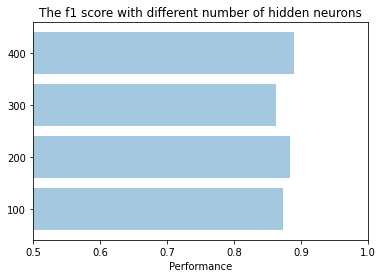

[0.8733333333333333, 0.8833333333333333, 0.8633333333333333, 0.89]


In [10]:
number=('100','200','300','400') 
y_pos = np.arange(len(number))
performance = result  
plt.barh(y_pos, performance, align='center', alpha=0.4) 
plt.yticks(y_pos, number)  
plt.xlabel('Performance')  
plt.xlim(0.5,1)  
plt.title('The f1 score with different number of hidden neurons')  
plt.show()
print(result)  

In [14]:
class customMLPClassifier(MLPClassifier):
    def resample_with_replacement(self, X_train, y_train, sample_weight):

        # normalize sample_weights if not already
        sample_weight = sample_weight / sample_weight.sum(dtype=np.float64)

        X_train_resampled = np.zeros((len(X_train), len(X_train[0])), dtype=np.float32)
        y_train_resampled = np.zeros((len(y_train)), dtype=np.int)
        for i in range(len(X_train)):
            # draw a number from 0 to len(X_train)-1
            draw = np.random.choice(np.arange(len(X_train)), p=sample_weight)

            # place the X and y at the drawn number into the resampled X and y
            X_train_resampled[i] = X_train[draw]
            y_train_resampled[i] = y_train[draw]

        return X_train_resampled, y_train_resampled


    def fit(self, X, y, sample_weight=None):
        if sample_weight is not None:
            X, y = self.resample_with_replacement(X, y, sample_weight)

        return self._fit(X, y, incremental=(self.warm_start and hasattr(self, "classes_")))

ada_clf = AdaBoostClassifier(
    customMLPClassifier(hidden_layer_sizes=(nohn,), solver='sgd', activation='tanh', batch_size=256, verbose=True, early_stopping=True), n_estimators=50,
    learning_rate=0.5, random_state=0)
ada_clf.fit(X_train_pca, y_train)
y_pred = ada_clf.predict(X_test_pca)
y_pred

流式输出内容被截断，只能显示最后 5000 行内容。
Validation score: 0.816667
Iteration 70, loss = 0.85643236
Validation score: 0.816667
Iteration 71, loss = 0.84229320
Validation score: 0.816667
Iteration 72, loss = 0.82849817
Validation score: 0.816667
Iteration 73, loss = 0.81511537
Validation score: 0.825000
Iteration 74, loss = 0.80191066
Validation score: 0.833333
Iteration 75, loss = 0.78902650
Validation score: 0.833333
Iteration 76, loss = 0.77658797
Validation score: 0.833333
Iteration 77, loss = 0.76431298
Validation score: 0.833333
Iteration 78, loss = 0.75234100
Validation score: 0.833333
Iteration 79, loss = 0.74055145
Validation score: 0.833333
Iteration 80, loss = 0.72907066
Validation score: 0.833333
Iteration 81, loss = 0.71793008
Validation score: 0.833333
Iteration 82, loss = 0.70682857
Validation score: 0.833333
Iteration 83, loss = 0.69605949
Validation score: 0.833333
Iteration 84, loss = 0.68548114
Validation score: 0.833333
Iteration 85, loss = 0.67517600
Validation score: 0.833333
Va

array([18, 20, 22,  3, 33, 22, 35, 39, 17,  7,  3, 37, 16,  5,  7, 12, 27,
       12, 15, 18, 38, 39, 25, 35, 20, 18, 39, 23,  5, 24, 27, 20, 12, 13,
       27, 32,  8,  5, 39, 39,  8,  4,  7, 33, 22, 38,  6, 25, 38, 16, 28,
        3,  8, 20,  5,  8,  6,  5, 12, 18,  2, 39, 26, 13, 34, 18,  8, 23,
        8, 22, 15, 20, 39, 16,  4, 38, 22, 13, 13, 32,  9,  8, 23, 17, 28,
       26, 15, 13, 33, 15,  8, 18, 37, 28, 26, 28, 11, 18,  7, 18, 32, 27,
       11, 13, 15, 17, 27,  4,  7, 38,  4,  5, 34, 26, 27, 23, 13,  6,  4,
       15, 28, 23, 35,  9, 13, 18, 33, 35, 18,  6, 28,  7, 28, 22,  5, 38,
       33,  7,  8, 38, 15, 27, 26, 11, 26,  3, 16, 27,  6,  8, 13, 20,  7,
       26,  5,  6, 24,  2,  8,  8, 33,  5, 33, 25, 38, 24, 16,  9, 20,  3,
       32, 35, 23,  4, 37,  2, 37, 12, 35, 16, 38, 34, 37, 20,  3,  3,  7,
       32, 25, 35, 26, 28, 20, 37, 22, 38, 39, 23, 27, 22, 12,  8, 17, 34,
       18,  2, 33, 25, 28, 37, 39, 22, 32, 37, 20, 11, 26,  4, 28, 24,  7,
       22, 26, 18, 26, 13

In [12]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9566666666666667


In [16]:
print(ada_clf.estimator_weights_)
print(ada_clf.estimator_errors_)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[0.07083333 0.135542   0.08725049 0.08839491 0.12534629 0.1526513
 0.11900856 0.2463019  0.16099293 0.1459185  0.14244678 0.13629241
 0.16396128 0.12379345 0.125847   0.09227426 0.13669364 0.12891561
 0.14734734 0.16715408 0.20906511 0.16848926 0.09343421 0.12663238
 0.18371306 0.18618196 0.16413099 0.08707886 0.15555648 0.13372329
 0.24400951 0.112903   0.10671198 0.12112694 0.14936621 0.18800074
 0.18808599 0.0905487  0.1105689  0.19298624 0.11257034 0.10825027
 0.08516719 0.13166779 0.11539311 0.17685481 0.12792514 0.13485302
 0.10790463 0.09291299]


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00         6
         3.0       1.00      0.86      0.92        14
         4.0       1.00      1.00      1.00        10
         5.0       1.00      0.91      0.95        11
         6.0       1.00      1.00      1.00        10
         7.0       1.00      1.00      1.00        11
         8.0       0.56      1.00      0.72         9
         9.0       1.00      0.83      0.91         6
        11.0       1.00      1.00      1.00         7
        12.0       1.00      1.00      1.00         7
        13.0       1.00      0.93      0.97        15
        15.0       1.00      1.00      1.00        10
        16.0       1.00      1.00      1.00         7
        17.0       1.00      1.00      1.00         4
        18.0       1.00      1.00      1.00        14
        20.0       1.00      1.00      1.00        11
        22.0       1.00      1.00      1.00        12
        23.0       1.00    

In [24]:
ada_clf = AdaBoostClassifier(
    customMLPClassifier(hidden_layer_sizes=(nohn,), solver='sgd', activation='tanh', batch_size=256, verbose=True, early_stopping=True), n_estimators=25,
    learning_rate=0.5, random_state=0)
ada_clf.fit(X_train_pca, y_train)
y_pred = ada_clf.predict(X_test_pca)
y_pred

Iteration 1, loss = 3.56292136
Validation score: 0.066667
Iteration 2, loss = 3.52764792
Validation score: 0.083333
Iteration 3, loss = 3.47372313
Validation score: 0.083333
Iteration 4, loss = 3.40923101
Validation score: 0.116667
Iteration 5, loss = 3.33894111
Validation score: 0.125000
Iteration 6, loss = 3.26527210
Validation score: 0.150000
Iteration 7, loss = 3.18993598
Validation score: 0.150000
Iteration 8, loss = 3.11446257
Validation score: 0.183333
Iteration 9, loss = 3.03911654
Validation score: 0.200000
Iteration 10, loss = 2.96398002
Validation score: 0.200000
Iteration 11, loss = 2.88971570
Validation score: 0.225000
Iteration 12, loss = 2.81633967
Validation score: 0.283333
Iteration 13, loss = 2.74381606
Validation score: 0.300000
Iteration 14, loss = 2.67252973
Validation score: 0.333333
Iteration 15, loss = 2.60222084
Validation score: 0.350000
Iteration 16, loss = 2.53350050
Validation score: 0.408333
Iteration 17, loss = 2.46534818
Validation score: 0.425000
Iterat

array([18, 20, 22,  3, 33, 22, 35, 39, 17,  7,  3, 37, 16,  5,  7, 12, 27,
       12, 15, 18, 38, 39, 25, 35, 20, 18, 39, 23,  5, 24, 27, 20, 12, 13,
       27, 32,  8,  5, 39, 39,  8,  4,  7, 33, 22, 38,  6, 25, 38, 16, 28,
        3, 32, 20,  5,  8,  6,  5, 12, 18,  2, 39, 26, 13, 34, 18,  3, 23,
        8, 22, 15, 20, 39, 16,  4, 38, 22, 13, 13, 32,  9,  8, 23, 17, 28,
       26, 15, 13, 33, 15,  8, 18, 37, 28, 26, 28, 11, 18,  7, 18, 32, 27,
       11, 13, 15, 17, 27,  4,  7, 38,  4,  5, 34, 26, 27, 23, 13,  6,  4,
       15, 28, 23, 35,  9, 13, 18, 33, 35, 18,  6, 28,  7, 28, 22,  5, 38,
       33,  7,  8, 38, 15, 27, 26, 11, 26,  3, 16, 27,  6,  8, 13, 20,  7,
       26,  5,  6, 24,  2,  8,  8, 33,  5, 33, 25, 38, 24, 16,  9, 20,  3,
       32, 35, 23,  4, 37,  2, 37, 12, 35, 16, 38, 34, 37, 20,  3,  3,  7,
       32, 25, 35, 26, 28, 20, 37, 22, 38, 39, 23, 27, 22, 12,  8, 17, 34,
       18,  2, 33, 25, 28, 37, 39, 22, 32, 37, 20, 11, 26,  4, 28, 24,  7,
       22, 26, 18, 26, 13

In [20]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.97
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00         6
         3.0       1.00      0.93      0.96        14
         4.0       1.00      1.00      1.00        10
         5.0       1.00      0.91      0.95        11
         6.0       1.00      1.00      1.00        10
         7.0       1.00      1.00      1.00        11
         8.0       0.64      1.00      0.78         9
         9.0       1.00      0.83      0.91         6
        11.0       1.00      1.00      1.00         7
        12.0       1.00      1.00      1.00         7
        13.0       1.00      0.93      0.97        15
        15.0       1.00      1.00      1.00        10
        16.0       1.00      1.00      1.00         7
        17.0       1.00      1.00      1.00         4
        18.0       1.00      1.00      1.00        14
        20.0       1.00      1.00      1.00        11
        22.0       1.00      1.00      1.00        12
        23.0       1.0

In [23]:
print(ada_clf.estimator_errors_)

[0.0875     0.08254365 0.10490649 0.1127243  0.13472621 0.12753576
 0.10926479 0.15552757 0.11098959 0.10589191]


In [21]:
ada_clf = AdaBoostClassifier(
    customMLPClassifier(hidden_layer_sizes=(nohn,), solver='sgd', activation='tanh', batch_size=256, verbose=True, early_stopping=True), n_estimators=10,
    learning_rate=0.5, random_state=0)
ada_clf.fit(X_train_pca, y_train)
y_pred = ada_clf.predict(X_test_pca)
y_pred

Iteration 1, loss = 3.53539394
Validation score: 0.058333
Iteration 2, loss = 3.50017026
Validation score: 0.058333
Iteration 3, loss = 3.44614627
Validation score: 0.066667
Iteration 4, loss = 3.38162576
Validation score: 0.083333
Iteration 5, loss = 3.31165514
Validation score: 0.091667
Iteration 6, loss = 3.23886811
Validation score: 0.091667
Iteration 7, loss = 3.16469036
Validation score: 0.108333
Iteration 8, loss = 3.08963533
Validation score: 0.108333
Iteration 9, loss = 3.01490077
Validation score: 0.116667
Iteration 10, loss = 2.94087505
Validation score: 0.133333
Iteration 11, loss = 2.86778349
Validation score: 0.166667
Iteration 12, loss = 2.79570105
Validation score: 0.191667
Iteration 13, loss = 2.72411341
Validation score: 0.216667
Iteration 14, loss = 2.65461585
Validation score: 0.225000
Iteration 15, loss = 2.58547325
Validation score: 0.250000
Iteration 16, loss = 2.51776612
Validation score: 0.266667
Iteration 17, loss = 2.45130768
Validation score: 0.300000
Iterat

array([18, 20, 22,  3, 33, 22, 35, 39, 17,  7,  3, 37, 16,  5,  7, 12, 27,
       12, 15, 18, 38, 39, 25, 35, 20, 18, 39, 23,  5, 24, 27, 20, 12, 13,
       27, 32,  8,  5, 39, 39,  8,  4,  7, 33, 22, 38,  6, 25, 38, 16, 28,
        3,  8, 20,  5,  8,  6,  5, 12, 18,  2, 39, 26, 13, 34, 18,  7, 23,
        8, 22, 15, 20, 39, 16,  4, 38, 22, 13, 13, 32,  9,  8, 23, 17, 28,
       26, 15, 13, 33, 15,  8, 18, 37, 28, 26, 28, 11, 18,  7, 18, 32, 27,
       11, 13, 15, 17, 27,  4,  7, 38,  4,  5, 34, 26, 27, 23, 13,  6,  4,
       15, 28, 23, 35,  9, 13, 18, 33, 35, 18,  6, 28,  7, 28, 22,  5, 38,
       33,  7,  8, 38, 15, 27, 26, 11, 26,  3, 16, 27,  6,  8, 13, 20,  7,
       26,  5,  6, 24,  2,  8,  8, 33,  5, 33, 25, 38, 24, 16,  9, 20,  3,
       32, 35, 23,  4, 37,  2, 37, 12, 35, 16, 38, 34, 37, 20,  3,  3,  7,
       32, 25, 35, 26, 28, 20, 37, 22, 38, 39, 23, 27, 22, 12,  8, 17, 34,
       18,  2, 33, 25, 28, 37, 39, 22, 32, 37, 20, 11, 26,  4, 28, 24,  7,
       22, 26, 18, 26, 13

In [22]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9666666666666667
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00         6
         3.0       1.00      0.86      0.92        14
         4.0       1.00      1.00      1.00        10
         5.0       1.00      0.91      0.95        11
         6.0       1.00      1.00      1.00        10
         7.0       0.92      1.00      0.96        11
         8.0       0.60      1.00      0.75         9
         9.0       1.00      0.83      0.91         6
        11.0       1.00      1.00      1.00         7
        12.0       1.00      1.00      1.00         7
        13.0       1.00      0.93      0.97        15
        15.0       1.00      1.00      1.00        10
        16.0       1.00      1.00      1.00         7
        17.0       1.00      1.00      1.00         4
        18.0       1.00      1.00      1.00        14
        20.0       1.00      1.00      1.00        11
        22.0       1.00      1.00      1.00        12
        